In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [18]:
%ls
pd.set_option('display.max_columns', None)

LIWC.ipynb                            LIWC_loneliness_com_clean_0921.csv
LIWC_ForeverAlone_com_clean_0921.csv  LIWC_loneliness_sub_clean_0921.csv
LIWC_ForeverAlone_sub_clean_0921.csv  LIWC_lonely_com_clean_0921.csv
LIWC_isolation_com_clean_0921.csv     LIWC_lonely_sub_clean_0921.csv
LIWC_isolation_sub_clean_0921.csv


In [46]:
isolation_sub = pd.read_csv('LIWC_isolation_sub_clean_0921.csv')
fa_sub = pd.read_csv('LIWC_ForeverAlone_sub_clean_0921.csv')
lonely_sub = pd.read_csv('LIWC_lonely_sub_clean_0921.csv')
loneliness_sub = pd.read_csv('LIWC_loneliness_sub_clean_0921.csv')

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
isolation_com = pd.read_csv('LIWC_isolation_com_clean_0921.csv')
fa_com = pd.read_csv('LIWC_ForeverAlone_com_clean_0921.csv')
lonely_com = pd.read_csv('LIWC_lonely_com_clean_0921.csv')
loneliness_com = pd.read_csv('LIWC_loneliness_com_clean_0921.csv')

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
lonely_com=lonely_com[lonely_com['created_utc'] != "True"]

In [49]:
name_lst = ["isolation","ForeverAlone","lonely","loneliness"]
com_lst = [isolation_com,fa_com,lonely_com,loneliness_com]
sub_lst = [isolation_sub,fa_sub,lonely_sub,loneliness_sub]

In [98]:
def getIntegerUTC(row):
    return int(float(row))

def getTimeStamp(row):
     return datetime.datetime.fromtimestamp(row)
    
def getYear(row):
     return int(row.year)

def getMonth(row):
     return int(row.month)
    
def getDelta(df, author_col, time_col='created_utc'):
    df['date']=df[time_col].apply(getTimeStamp)
    gb = df.groupby(author_col)
    gb = gb.agg(min_date=('date',np.min), max_date=('date',np.max)).reset_index()
    gb['date_delta'] = (gb['max_date']-gb['min_date']).dt.days
    return gb

In [52]:
for df in (sub_lst + com_lst):
    df['created_utc']=df['created_utc'].apply(getIntegerUTC)
    df['date']=df['created_utc'].apply(getTimeStamp)

In [54]:
for idx, df in enumerate(sub_lst):
    df.to_csv("processed/liwc_{}_sub.csv".format(name_lst[idx]), index=False)
for idx, df in enumerate(com_lst):
    df.to_csv("processed/liwc_{}_com.csv".format(name_lst[idx]), index=False)

# Start from here

In [55]:
isolation_sub = pd.read_csv('processed/liwc_isolation_sub.csv')
fa_sub = pd.read_csv('processed/liwc_ForeverAlone_sub.csv')
lonely_sub = pd.read_csv('processed/liwc_lonely_sub.csv')
loneliness_sub = pd.read_csv('processed/liwc_loneliness_sub.csv')

In [56]:
isolation_com = pd.read_csv('processed/liwc_isolation_com.csv')
fa_com = pd.read_csv('processed/liwc_ForeverAlone_com.csv')
lonely_com = pd.read_csv('processed/liwc_lonely_com.csv')
loneliness_com = pd.read_csv('processed/liwc_loneliness_com.csv')

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
sub_all = pd.concat(sub_lst)
com_all = pd.concat(com_lst)

In [100]:
def getMonYear(row):
    return str(row.year)+'-'+str(row.month)

for df in [sub_all, com_all]:
    df['month'] = df['date'].apply(getMonth)
    df['year'] = df['date'].apply(getYear)
    df['year-month']=df['date'].apply(getMonYear)

In [297]:
sub = sub_all[sub_all['year']>2017]
sub['type']="submission"
sub['year']=sub['year'].astype(int)
sub['month']=sub['month'].astype(int)

com = com_all[com_all['year']>2017]
com['type']="comment"
com['year']=com['year'].astype(int)
com['month']=com['month'].astype(int)

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [298]:
all_post = pd.concat([sub,com])

In [299]:
sub_avg=pd.DataFrame(sub_all.groupby('year-month').mean().reset_index())
com_avg=pd.DataFrame(com_all.groupby('year-month').mean().reset_index())
all_avg=pd.DataFrame(all_post.groupby(['year-month','type']).mean().reset_index())

In [318]:
cate = ['posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'feel', 'health', 'sexual',"focuspast",
                                          "focuspresent",
                                          "focusfuture", 'work', 'leisure', 'home', 'money', 'relig', 'death', 'swear', 'netspeak']
order = []
for i in range(2018, 2022):
    for j in range(1,13):
        s = str(i)+"-"+str(j)
        order.append(s)

In [319]:
for s in cate:
    print("\""+s+"\""+",")

"posemo",
"negemo",
"anx",
"anger",
"sad",
"social",
"family",
"friend",
"feel",
"health",
"sexual",
"focuspast",
"focuspresent",
"focusfuture",
"work",
"leisure",
"home",
"money",
"relig",
"death",
"swear",
"netspeak",


In [353]:
from  matplotlib.ticker import FuncFormatter
# sub_avg['year']=sub_avg['year'].astype(int)
# sub_avg['month']=sub_avg['month'].astype(int)

def generateYearMonthScore(df, y_label):
    p = sns.catplot(data=df,x='year-month', y = y_label, hue="type", kind='point',aspect=3, linewidth=0.1,order=order[:-3])
    #p = sns.catplot(data=sub_avg,x='year-month', y = y_label, kind='point',aspect=4)
    p.fig.suptitle('Monthly trend of average {} score in all posts (2018-2021)'.format(y_label.upper()),fontsize="xx-large")
    #p.axes[0][0].invert_xaxis()
    #p.axes[0][0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    p.axes[0][0].tick_params(axis='x', labelrotation=45)
    p.savefig('../dashboard/social-loneliness-reddit/liwc/moy/{}-moy.png'.format(y_label))

def generateMonthScore(df, y_label):
    p = sns.catplot(data=df,x='year-month', y = ylb, kind='point',aspect=1, linewidth=0.1)
    #p = sns.catplot(data=sub_avg,x='year-month', y = y_label, kind='point',aspect=4)
    p.fig.suptitle('Monthly trend of average {} score in all posts (2018-2021)'.format(y_label.upper()),fontsize="xx-large")
    #p.axes[0][0].invert_xaxis()
    #p.axes[0][0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    #p.axes[0][0].tick_params(axis='x', labelrotation=45)
    p.savefig('../dashboard/social-loneliness-reddit/liwc/month/{}-mon.png'.format(y_label))

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplot

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplot

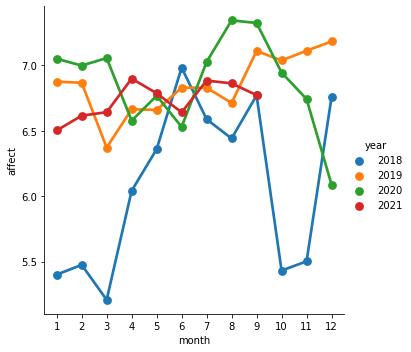

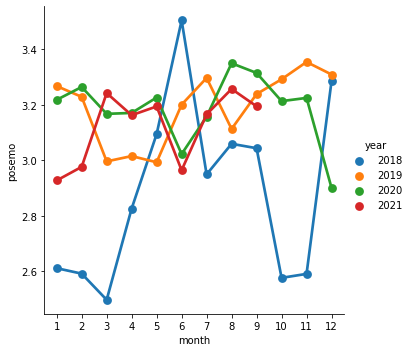

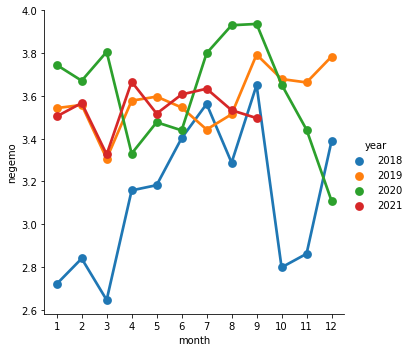

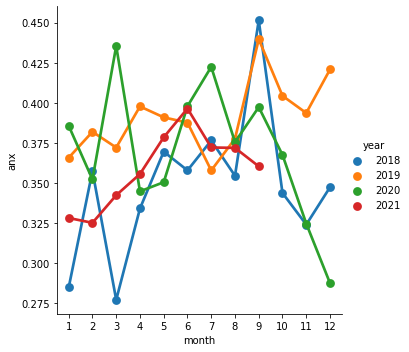

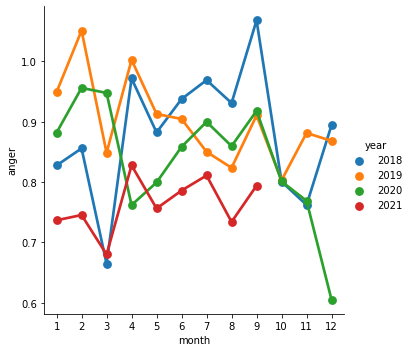

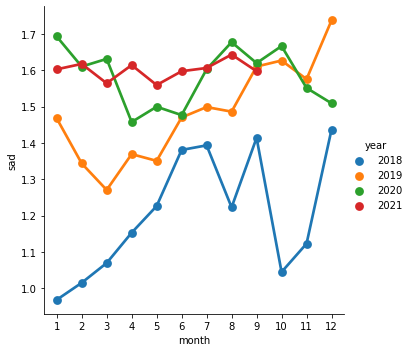

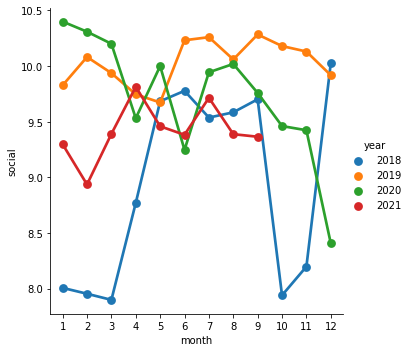

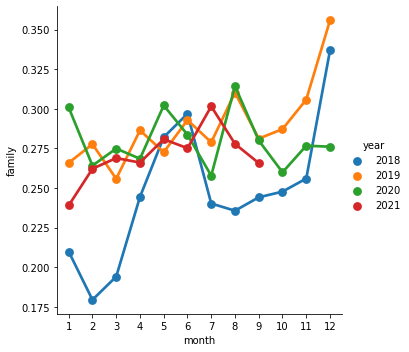

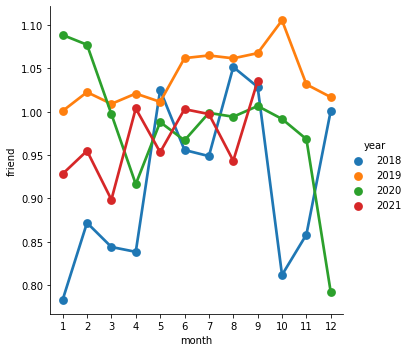

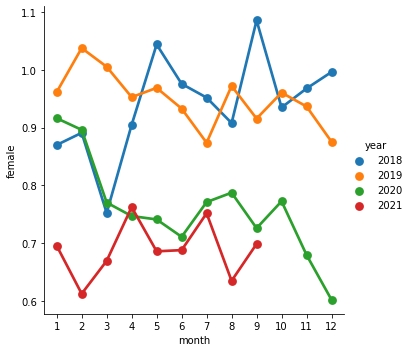

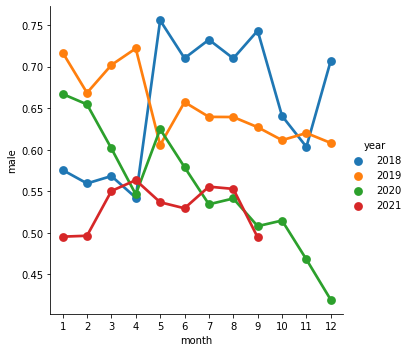

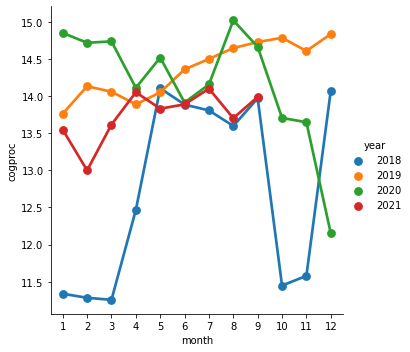

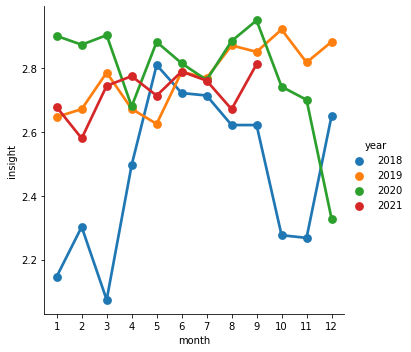

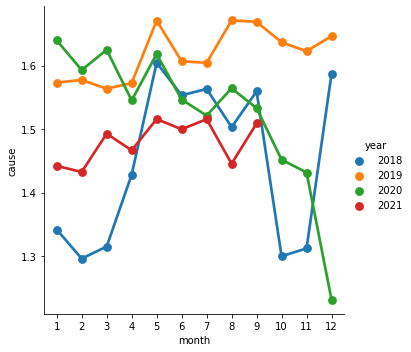

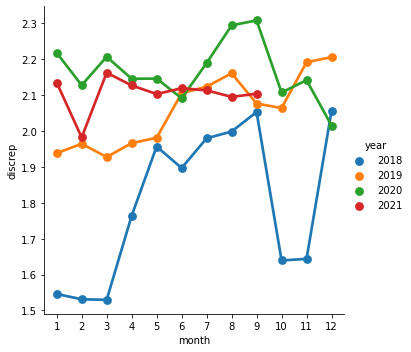

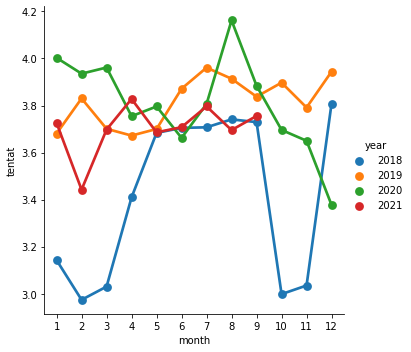

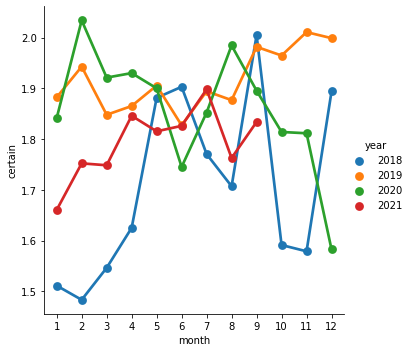

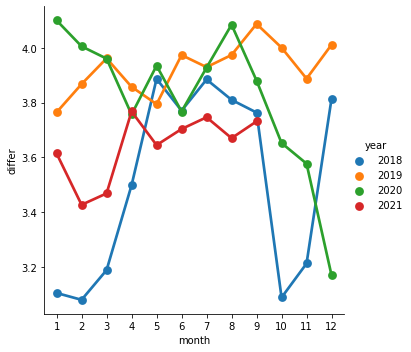

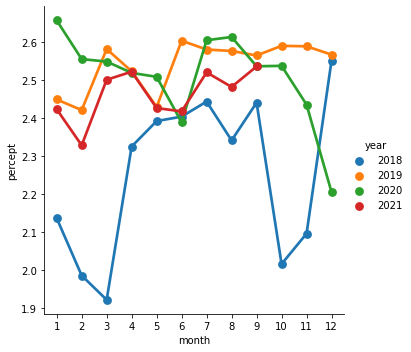

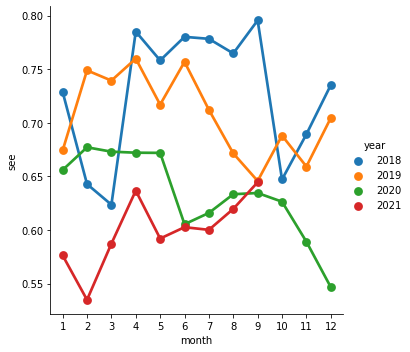

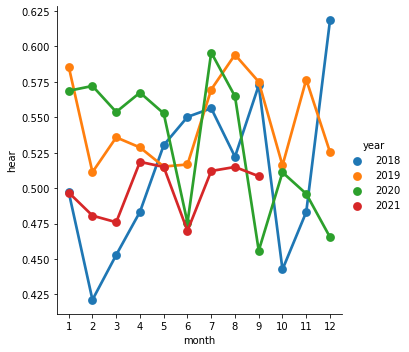

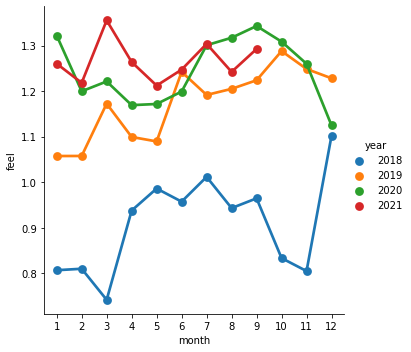

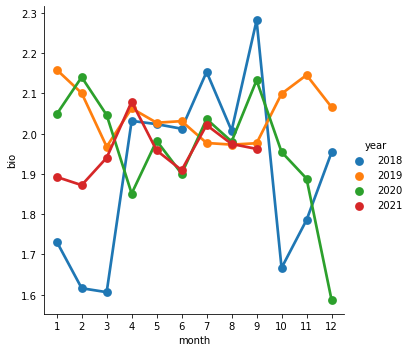

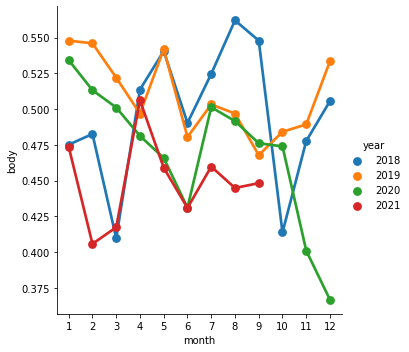

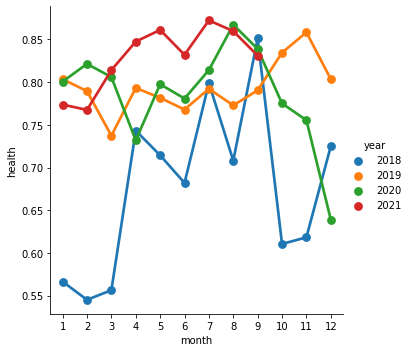

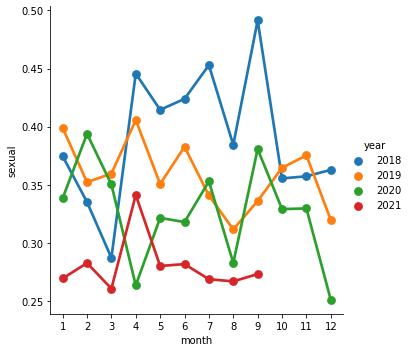

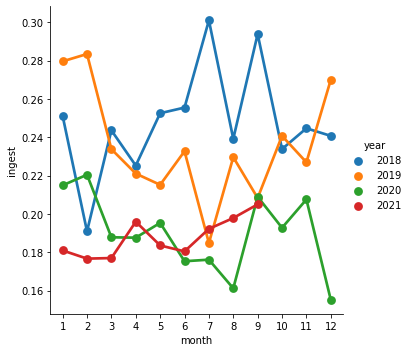

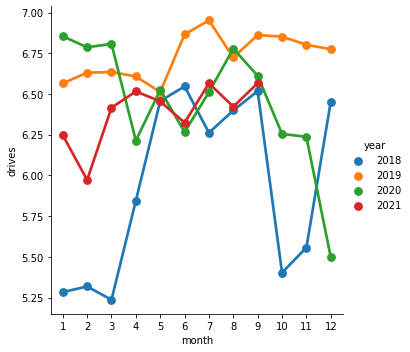

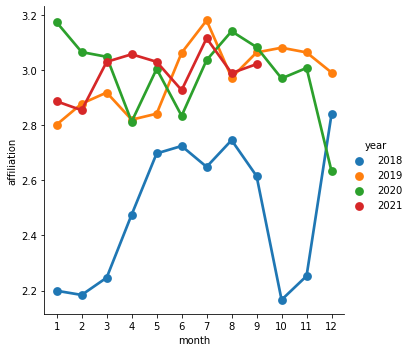

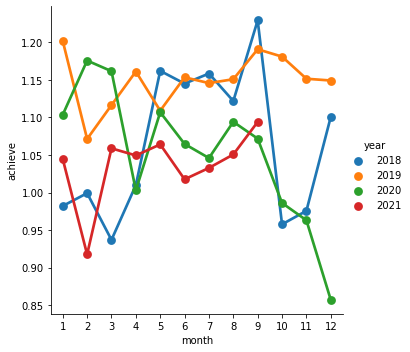

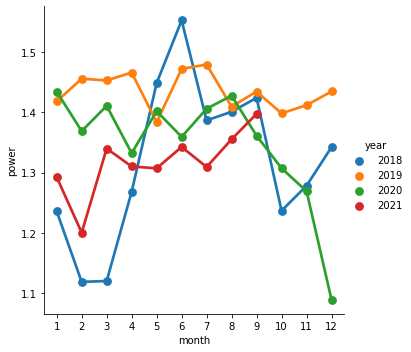

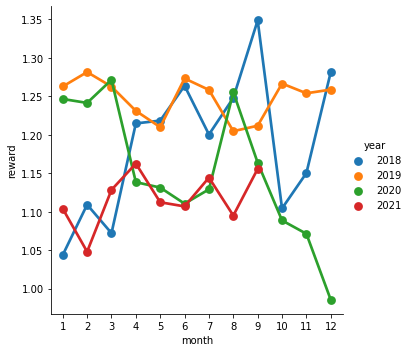

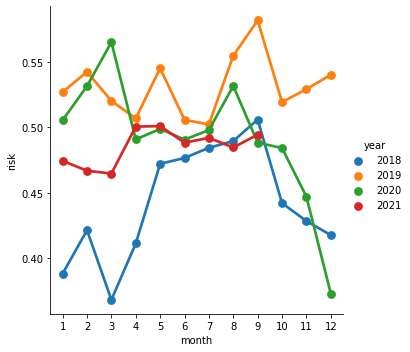

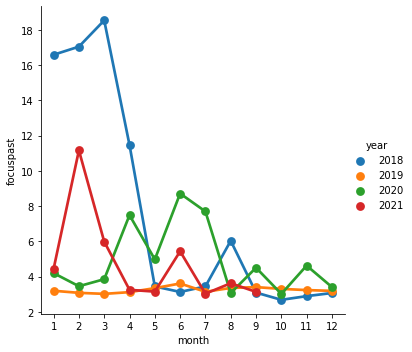

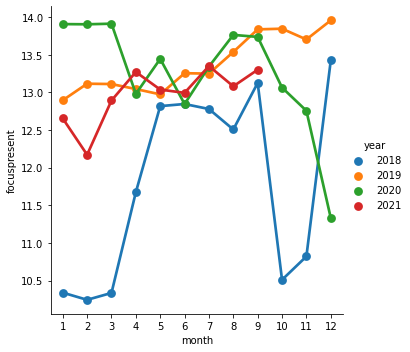

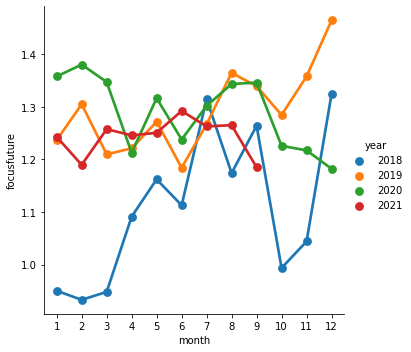

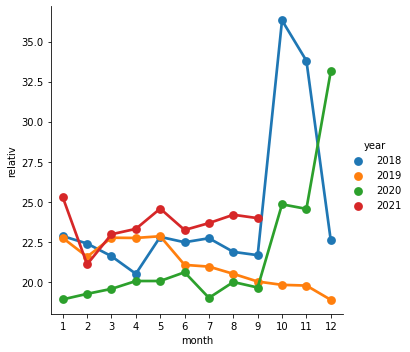

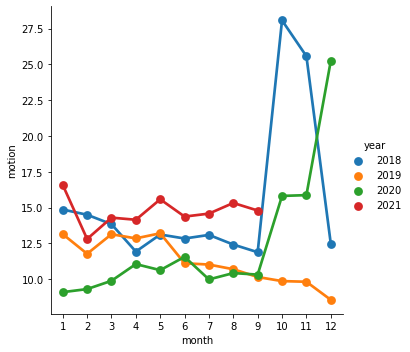

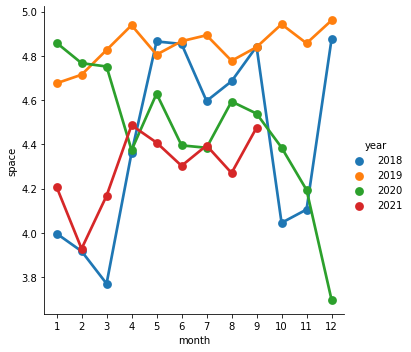

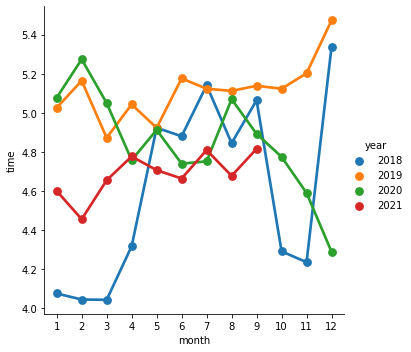

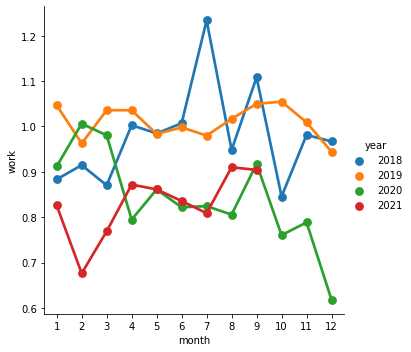

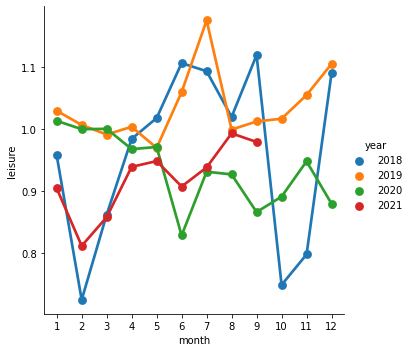

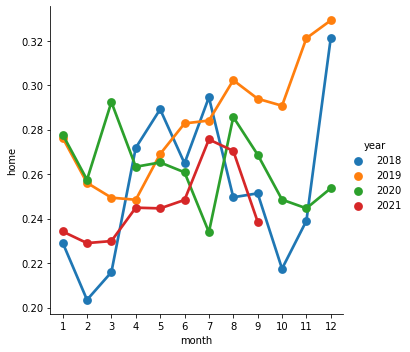

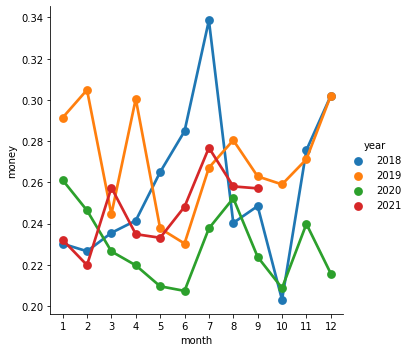

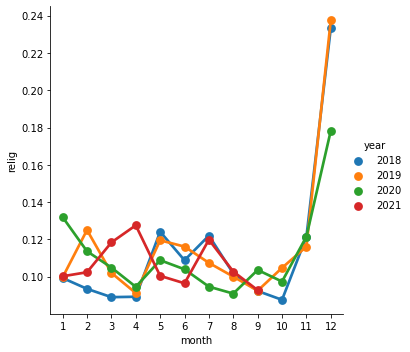

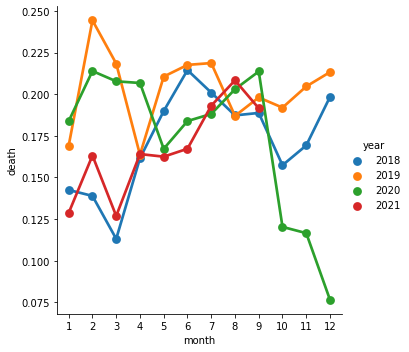

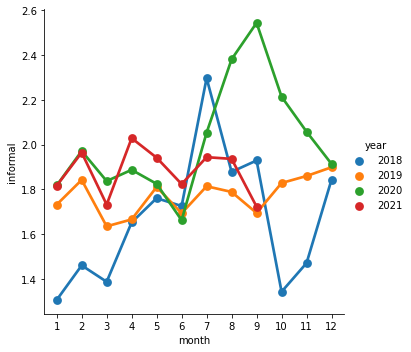

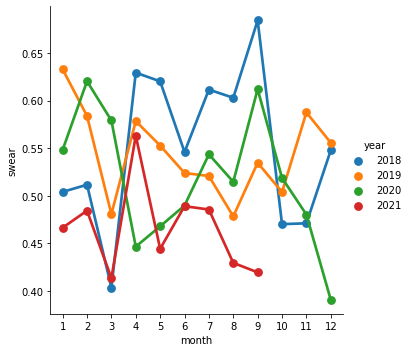

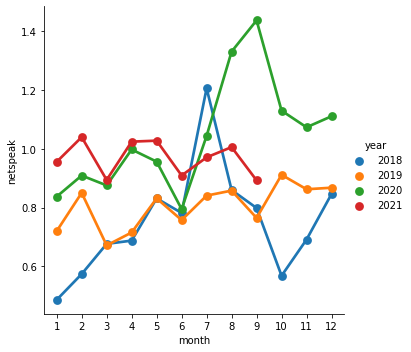

In [278]:
sub_avg2=sub_avg[sub_avg['year']>2017]
for ylb in cate:
    p = sns.catplot(data=sub_avg2,x="month", y= ylb,hue="year", kind='point',aspect=1, linewidth=0.1)

In [309]:
all_post

,subreddit,created_utc,id,title,author,author_fullname,num_comments,upvote_ratio,num_crossposts,over_18,total_awards_received,selftext,domain,full_link,permalink,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,date,month,year,year-month,type,link_id,parent_id,collapsed,is_submitter,no_follow,body.1
0,isolation,1632184386,ps7kr9,Well-being and socialising during lockdowns,kdun2491,t2_dhgn6pio,0.0,1.0,0.0,False,0.0,Hi! I'm currently studying design at the Unive...,self.isolation,https://www.reddit.com/r/isolation/comments/ps...,/r/isolation/comments/ps7kr9/wellbeing_and_soc...,65,61.33,62.10,43.37,54.74,10.83,23.08,73.85,46.15,10.77,9.23,4.62,0.00,4.62,0.00,0.00,1.54,7.69,9.23,10.77,4.62,7.69,0.00,13.85,1.54,0.00,0.00,4.62,0.00,4.62,3.08,1.54,0.00,0.00,1.54,9.23,0.00,0.00,0.00,0.00,10.77,0.00,1.54,4.62,6.15,1.54,6.15,1.54,0.00,0.00,0.00,1.54,0,0.00,0.00,0.00,6.15,3.08,0.00,1.54,1.54,0.00,1.54,7.69,0.00,13.85,0.00,7.69,6.15,6.15,0.00,0.00,0.00,0.0,0.0,4.62,0.00,3.08,0.0,1.54,0.00,38.46,9.23,4.62,0.0,0.00,0.00,4.62,3.08,0.00,4.62,3.08,9.23,2021-09-20 19:33:06,9,2021,2021-9,submission,NaN,NaN,NaN,NaN,NaN,NaN
1,isolation,1631354711,pm4qp3,POP!,Mr_Videodrome_Clown,t2_8ep5vb4j,0.0,1.0,0.0,False,0.0,[POP!](https://www.youtube.com/watch?v=fNEglL2...,self.isolation,https://www.reddit.com/r/isolation/comments/pm...,/r/isolation/comments/pm4qp3/pop/,12,93.26,50.00,1.00,25.77,12.00,16.67,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.33,8.33,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.33,0.00,0.00,0.00,0.00,0.00,0.00,8.33,0.00,0.00,0.0,0.0,8.33,0.00,8.33,0.0,0.00,0.00,116.67,16.67,0.00,0.0,8.33,8.33,8.33,0.00,0.00,0.00,16.67,58.33,2021-09-11 05:05:11,9,2021,2021-9,submission,NaN,NaN,NaN,NaN,NaN,NaN
2,isolation,1627707474,ov14n3,Happy Place Shortfilm,Da_boss98,t2_btqxu1l5,0.0,1.0,0.0,False,0.0,[removed],self.isolation,https://www.reddit.com/r/isolation/comments/ov...,/r/isolation/comments/ov14n3/happy_place_short...,1,93.26,50.00,99.00,25.77,1.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,200.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00,2021-07-30 23:57:54,7,2021,2021-7,submission,NaN,NaN,NaN,NaN,NaN,NaN
3,isolation,1627513605,otlcfw,At a major amusement park with 9 people,2fry,t2_hj57o,1.0,1.0,0.0,False,0.0,"I'm at cedar point, a large amusement park in ...",self.isolation,https://www.reddit.com/r/isolation/comments/ot...,/r/isolation/comments/otlcfw/at_a_major_amusem...,111,63.24,6.30,99.00,6.05,15.86,14.41,86.49,54.95,14.41,12.61,11.71,0.00,0.90,0.00,0.00,1.80,5.41,17.12,11.71,3.60,3.60,5.41,19.82,7.21,2.70,1.80,0.90,3.60,5.41,1.80,3.60,0.00,0.00,2.70,8.11,0.00,1.80,0.00,0.00,14.41,1.80,1.80,0.90,2.70,0.90,7.21,0.90,0.00,0.00,0.90,0.00,0,0.00,0.00,0.00,6.31,3.60,0.90,1.80,0.00,0.00,7.21,10.81,0.00,20.72,2.70,15.32,2.70,0.90,0.90,0.00,0.00,0.0,0.0,0.90,0.00,0.90,0.0,0.00,0.90,10.81,6.31,0.90,0.0,0.00,0.00,0.00,0.00,0.00,2.70,0.00,0.90,2021-07-28 18:06:45,7,2021,202

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:318: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:318: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



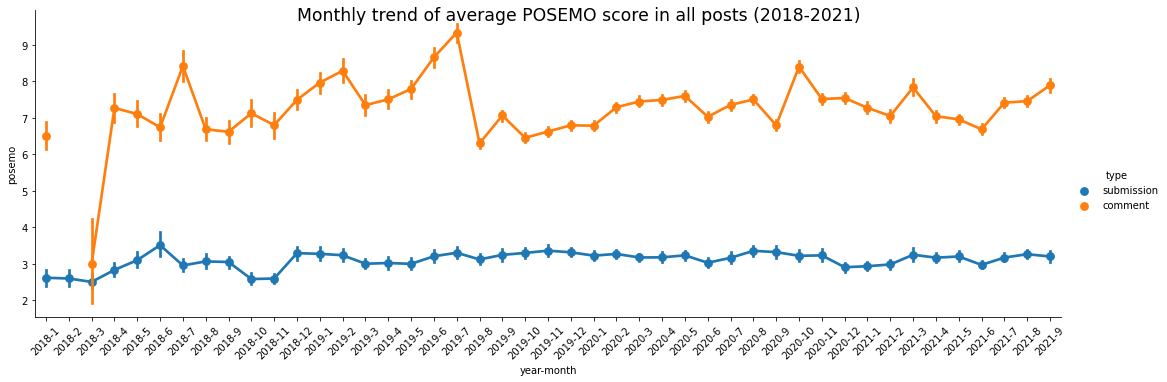

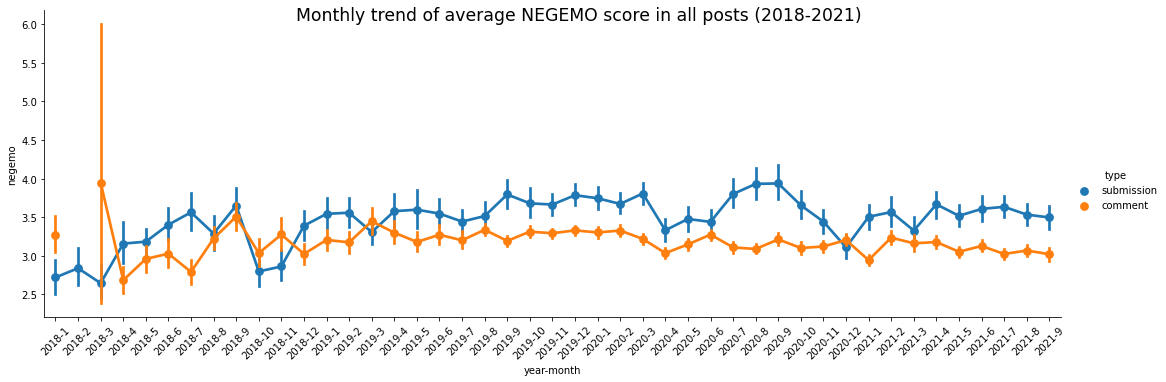

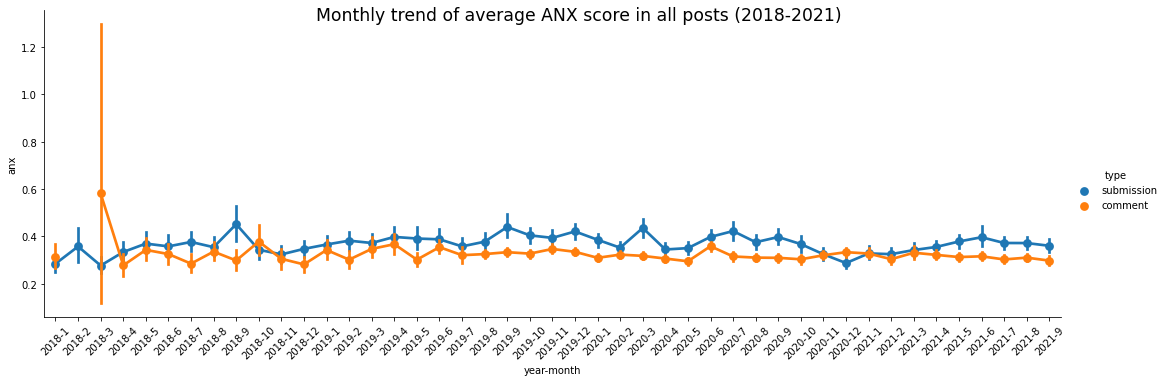

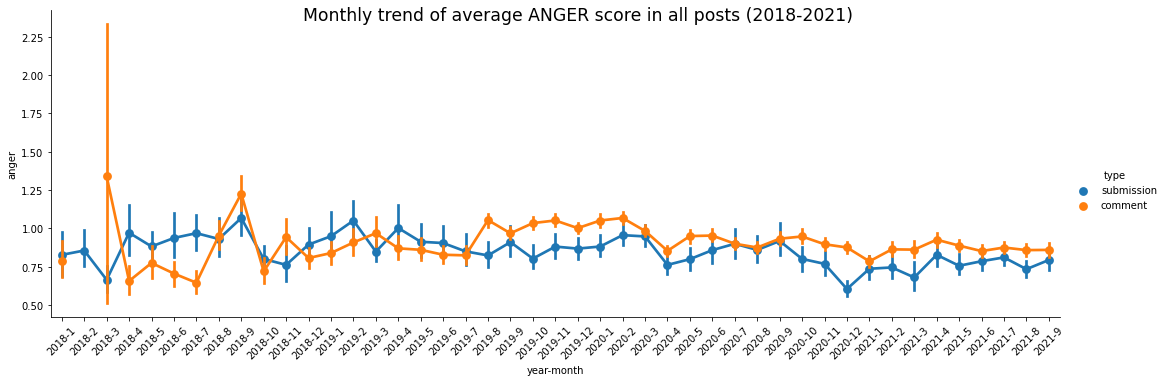

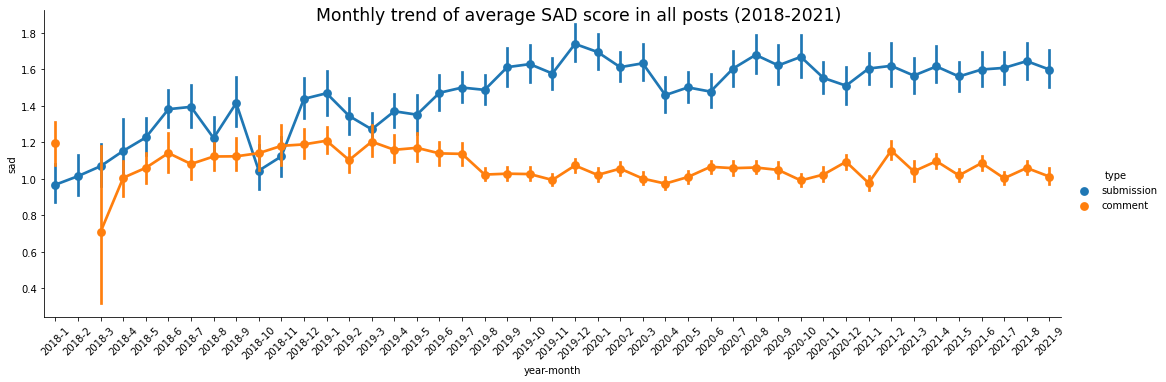

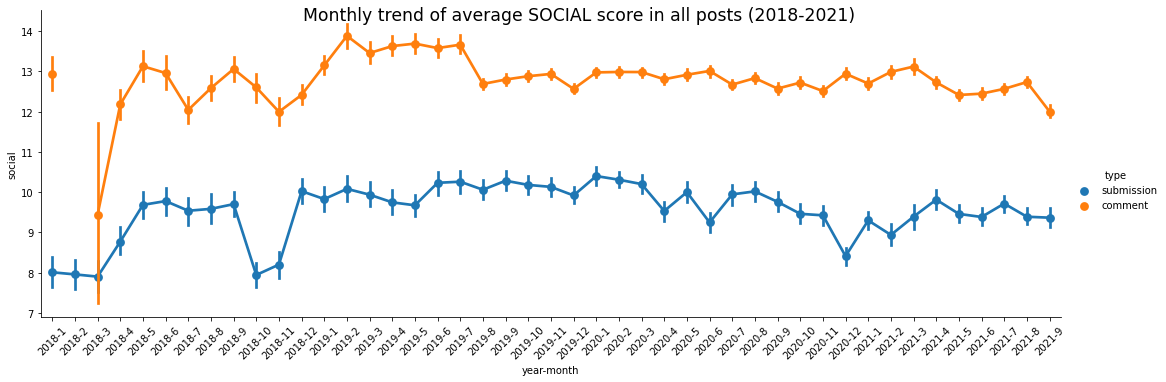

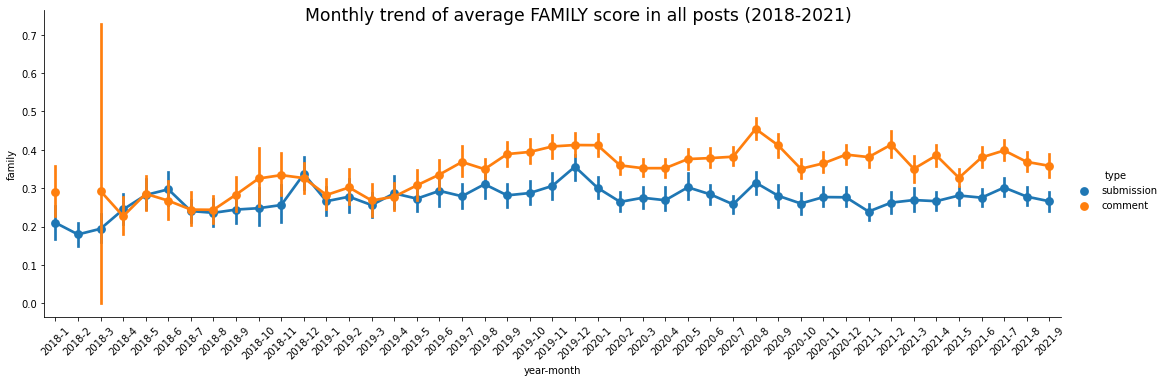

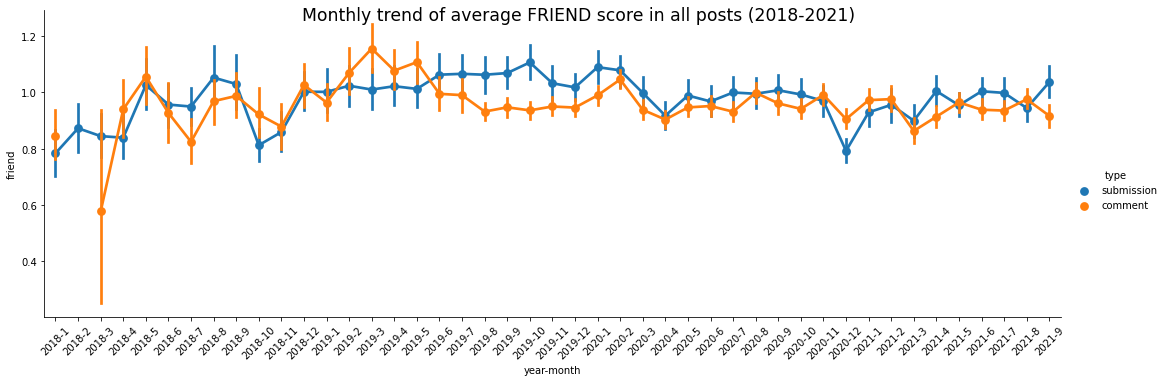

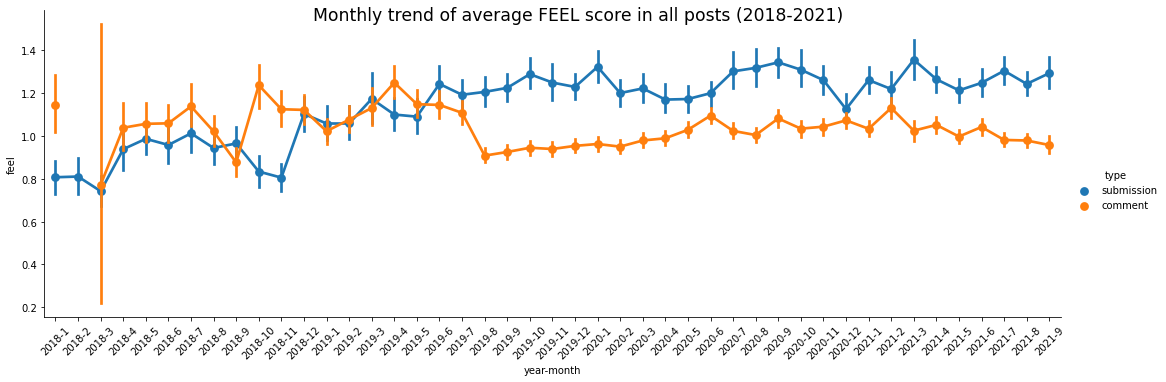

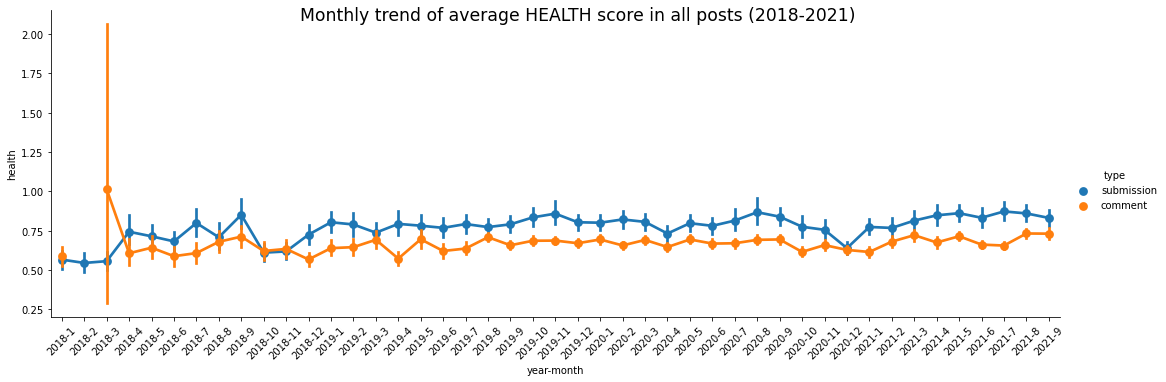

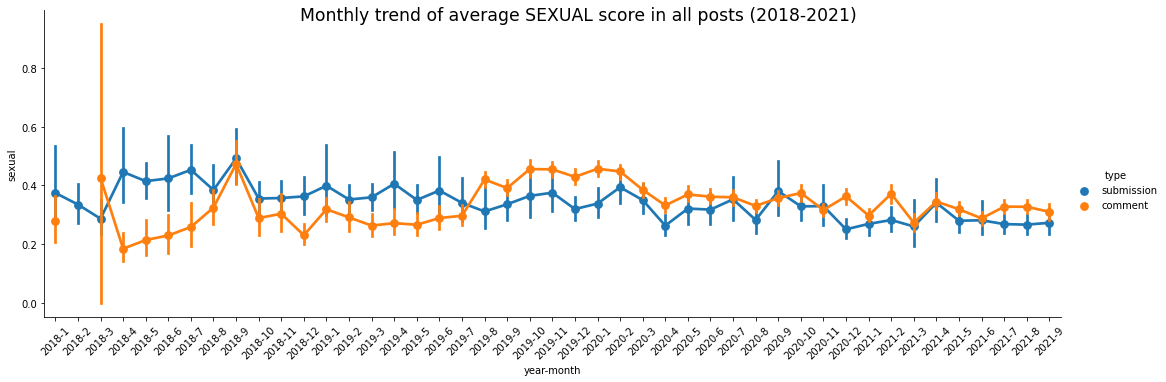

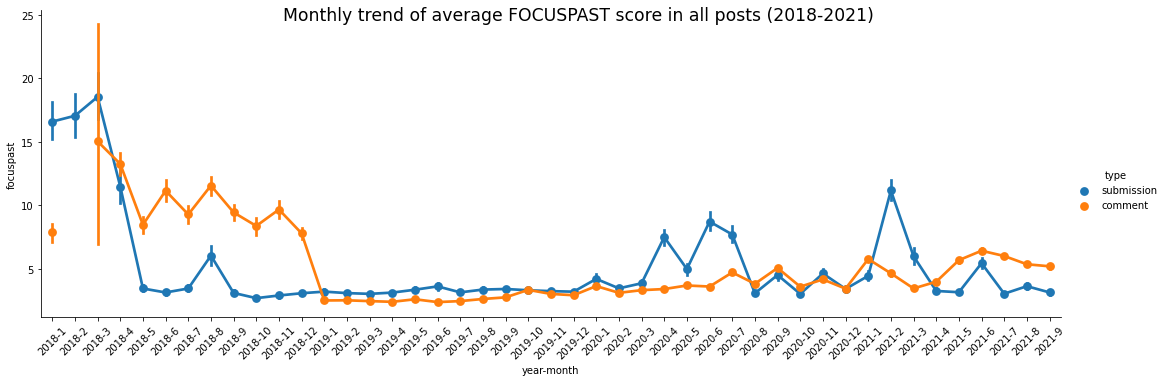

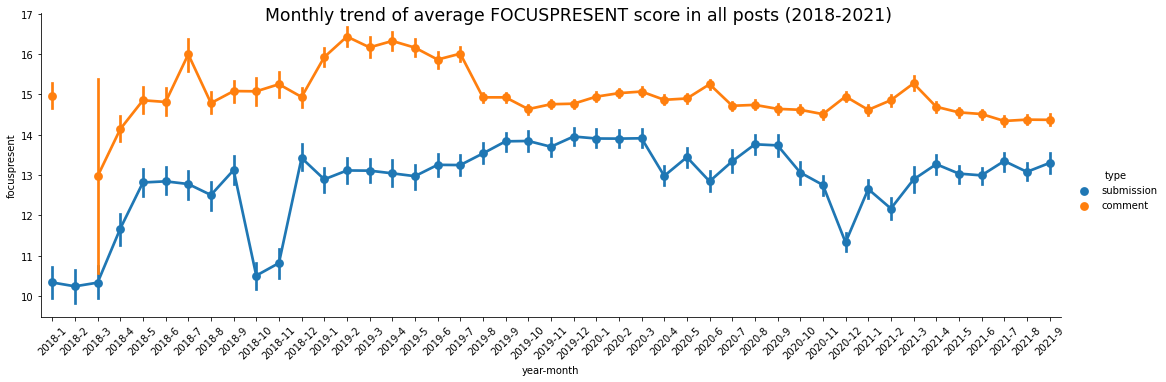

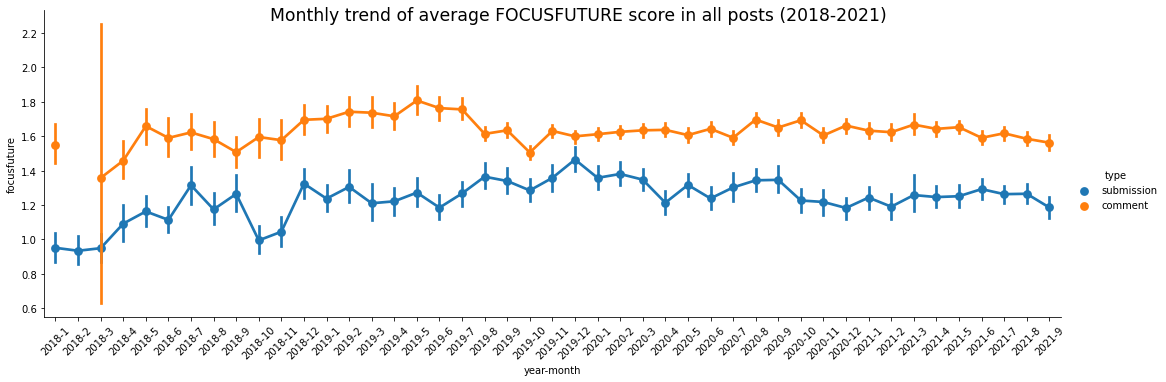

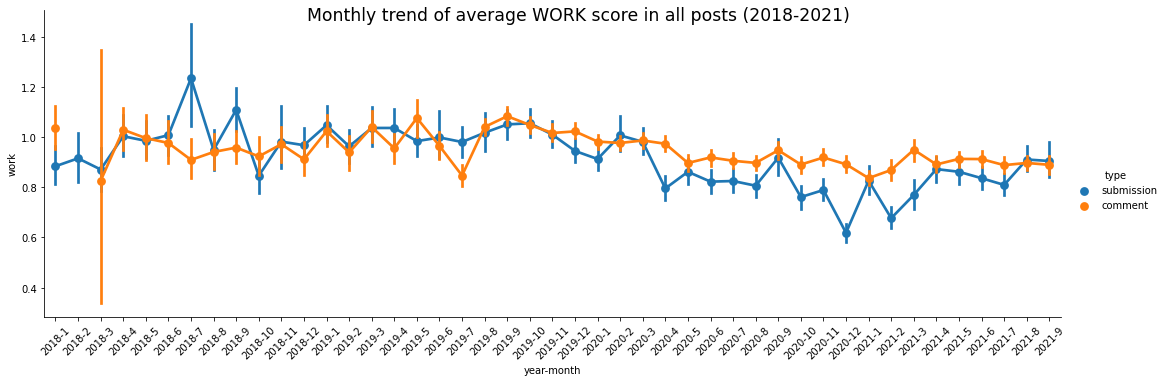

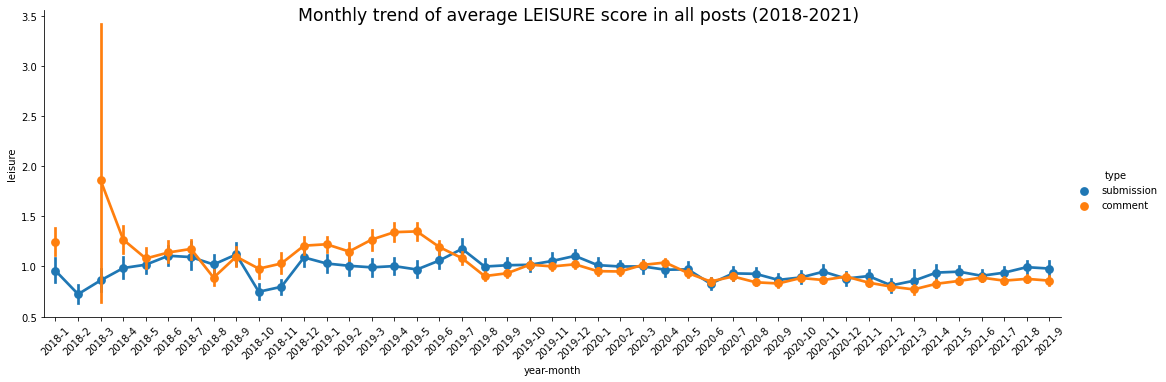

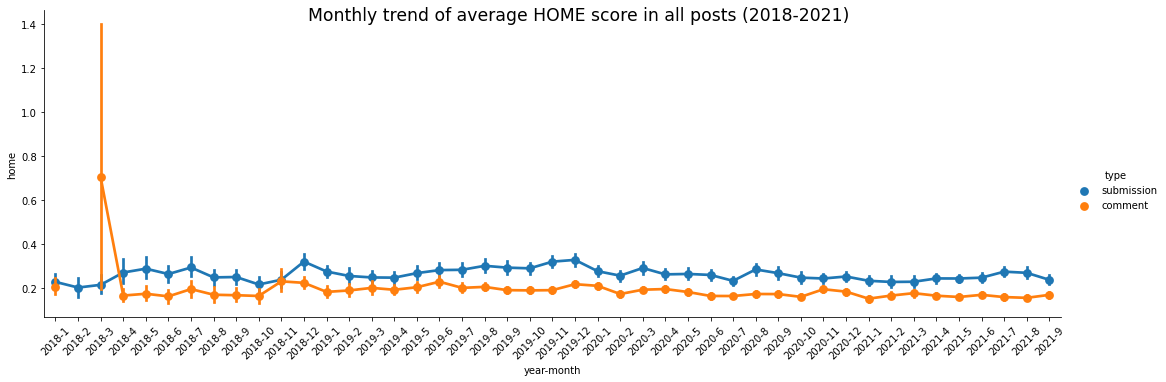

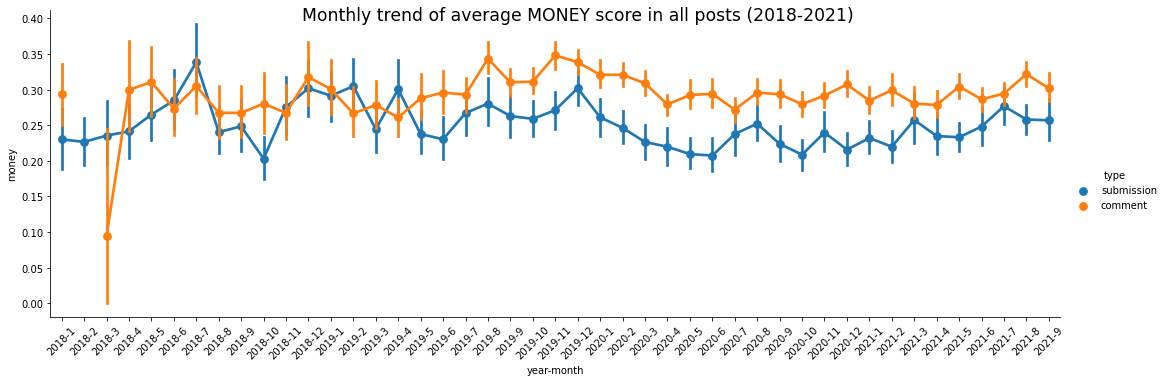

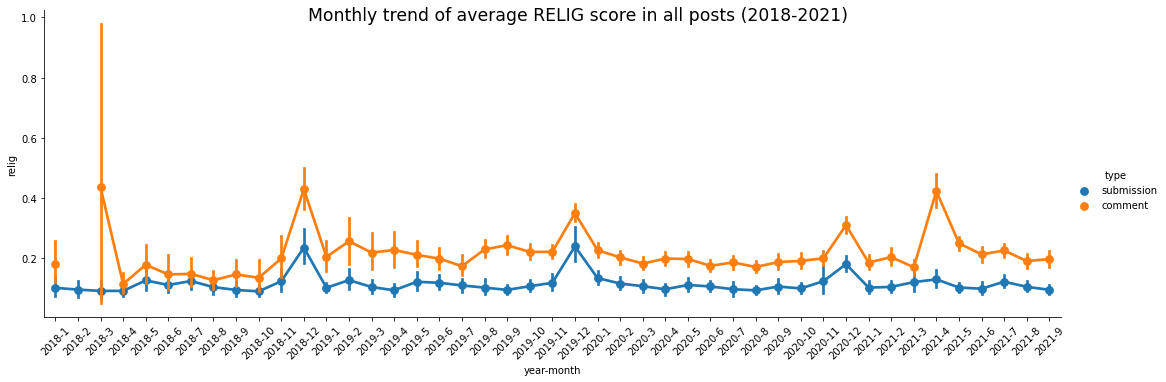

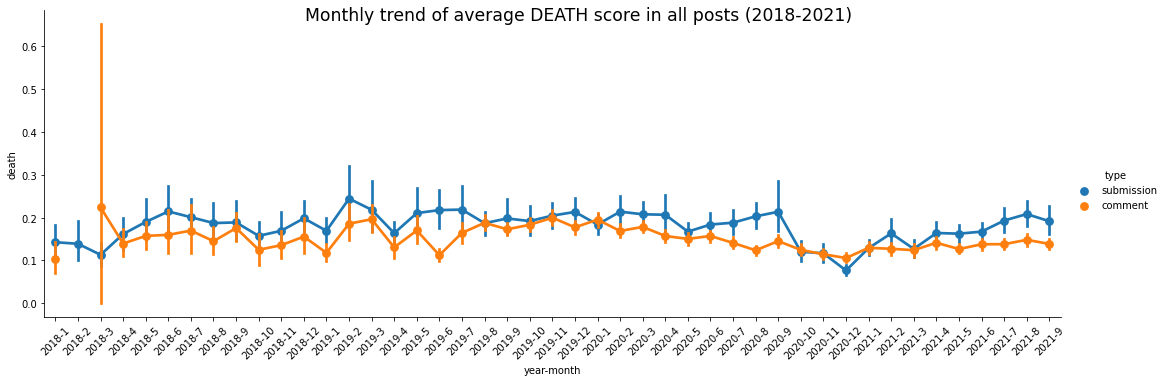

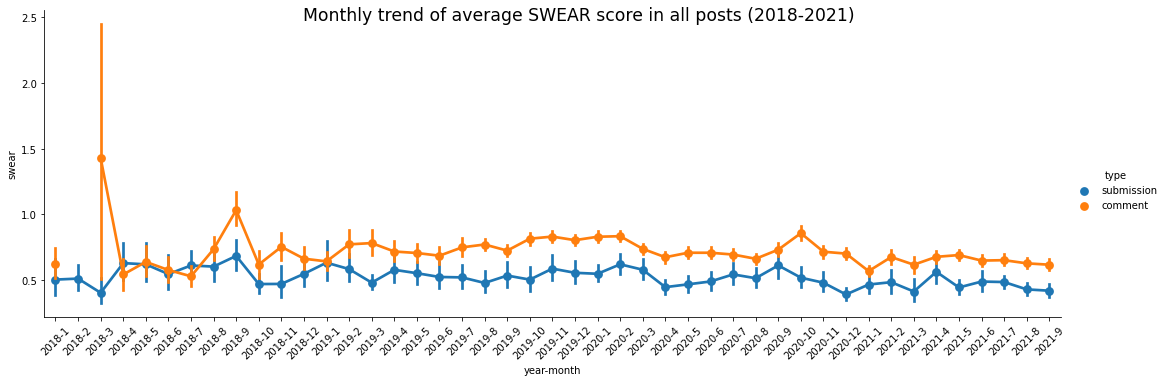

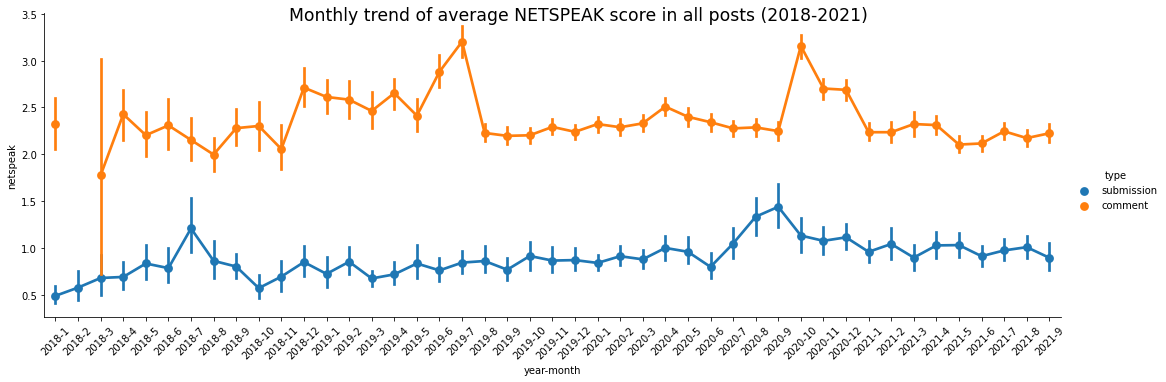

In [354]:
for ylb in cate:
    generateYearMonthScore(all_post, ylb)

In [256]:
min_sub_date = min(sub['date'])
def getTimeDelta(row):
    return (row-min_sub_date).days / 30

sub['delta']=sub['date'].apply(getTimeDelta)

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


AttributeError: 'FacetGrid' object has no attribute 'xaxis'

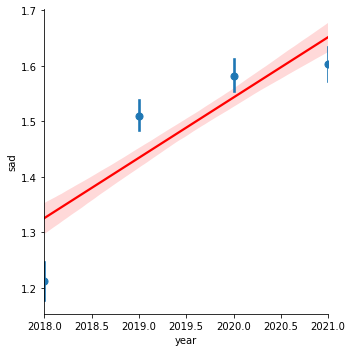

In [296]:
# fig_dims = (16,4)
# fig, ax = plt.subplots(figsize=fig_dims)
y_label="sad"
p = sns.lmplot(data=sub,x='year', y = y_label, x_estimator=np.mean,aspect=1,line_kws={'color': 'red'})

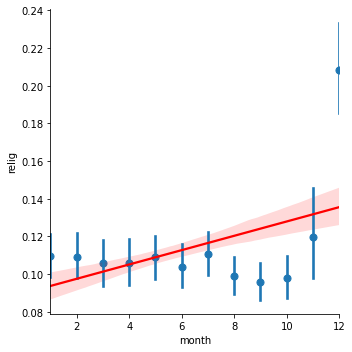

In [282]:
p = sns.lmplot(data=sub,x='month', y = y_label, x_estimator=np.mean,aspect=1,line_kws={'color': 'red'})

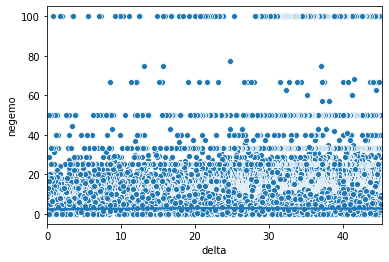

In [261]:
ax = sns.scatterplot(data=sub, x="delta", y=y_label)
sns.regplot(data=sub, x="delta", y=y_label, scatter=False, ax=ax, lowess=True)

# author

In [335]:
min_date = pd.DataFrame(all_post.groupby('author_fullname').agg({'date': np.min})).reset_index()
min_date.rename(columns={"date": "min_date"},inplace=True)

In [336]:
col = ['author_fullname', 'date'] + cate
post = all_post[col]

In [340]:
post = post.merge(min_date, on="author_fullname", how='inner')

In [343]:
post['delta'] = (post['date'] - post['min_date'])

In [345]:
def getDays(row):
    return row.days
post['delta'] = post['delta'].apply(getDays)

In [347]:
post.to_csv("time_delta_all.csv",index=False)

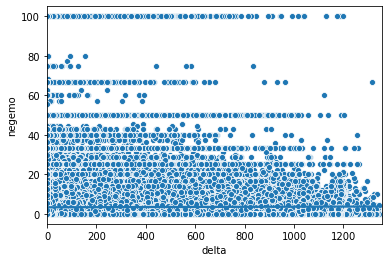

In [348]:
ylb="negemo"
ax = sns.scatterplot(data=post, x="delta", y=ylb)
sns.regplot(data=post, x="delta", y=ylb, scatter=False, ax=ax)

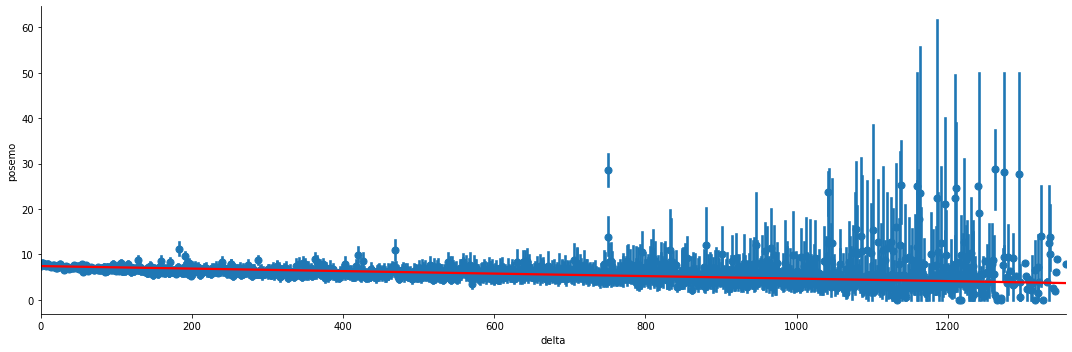

In [350]:
ylb="posemo"
p = sns.lmplot(data=post,x='delta', 
               y = ylb, 
               hue="type", 
               x_estimator=np.mean,
               aspect=2,
               markers=["o", "x"],
               #line_kws={'color': 'red'}
              )